# Lista de Exercícios 1 — Modelagem e Simulação (Mestrado 2025)
**Autora: Bárbara Cássia Florentino Rosa**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom

# Exercício 1

### a)

In [58]:
a = 5
c = 3
m = 16
X0 = 7

valores = []
x = X0
for _ in range(5):
    x = (a * x + c) % m
    valores.append(x)

print("Cinco primeiros números gerados:", valores)

Cinco primeiros números gerados: [6, 1, 8, 11, 10]


### b)

In [59]:
x = X0
sequencia = []
while True:
    x = (a * x + c) % m
    if x in sequencia:
        break
    sequencia.append(x)

print("Período do gerador:", len(sequencia))

Período do gerador: 16


### c) 

##### O GLC misto apresentado não é adequado para aplicações criptográficas devido ao seu pequeno período e previsibilidade. Para aplicações criptográficas, é essencial utilizar geradores com períodos longos e propriedades que garantam imprevisibilidade, como os geradores baseados em algoritmos criptográficos seguros.

# Exercício 2

In [60]:
mu = 3  

# a) Probabilidade de exatamente 5 chamadas
prob_5 = poisson.pmf(5, mu)

# b) Probabilidade de no máximo 2 chamadas
prob_max_2 = poisson.cdf(2, mu)

print("Exercício 2")
print(f"a) P(X=5): {prob_5:.4f}")
print(f"b) P(X≤2): {prob_max_2:.4f}")


Exercício 2
a) P(X=5): 0.1008
b) P(X≤2): 0.4232


# Exercício 3

In [61]:
n = 10
p = 0.25

# a)
prob_3 = binom.pmf(3, n, p)

# b)
prob_max2_binom = binom.cdf(2, n, p)

# c)
media_binom = n * p
desvio_binom = (n * p * (1 - p)) ** 0.5

print("Exercício 3")
print(f"a) Probabilidade de acertar 3 questões: {prob_3:.4f}")
print(f"b) Probabilidade de acertar no máximo 2 questões: {prob_max2_binom:.4f}")
print(f"c) Média: {media_binom:.2f} & Desvio padrão: {desvio_binom:.4f}")


Exercício 3
a) Probabilidade de acertar 3 questões: 0.2503
b) Probabilidade de acertar no máximo 2 questões: 0.5256
c) Média: 2.50 & Desvio padrão: 1.3693


# Exercício 4

Exercício 4
Probabilidade de pelo menos 3 falhas: 0.5768


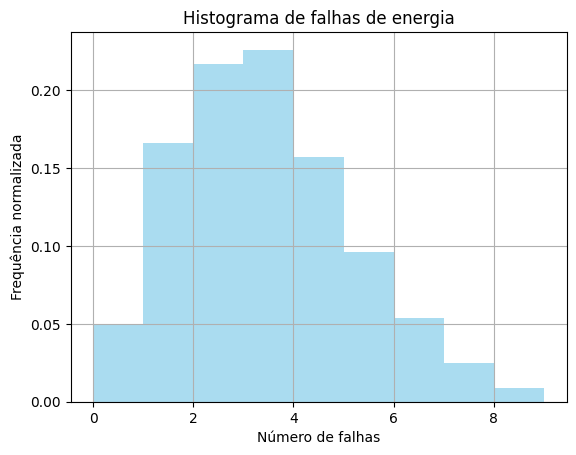

In [62]:
lambda_falhas = 3
prob_pelo_menos3 = 1 - poisson.cdf(2, lambda_falhas)

print("Exercício 4")
print(f"Probabilidade de pelo menos 3 falhas: {prob_pelo_menos3:.4f}")

np.random.seed(42)
falhas = poisson.rvs(lambda_falhas, size=1000)
plt.hist(falhas, bins=range(10), density=True, alpha=0.7, color='skyblue')
plt.title('Histograma de falhas de energia')
plt.xlabel('Número de falhas')
plt.ylabel('Frequência normalizada')
plt.grid()
plt.show()

# Exercício 5

In [63]:
media_exponencial = 2
lambda_exp = 1 / media_exponencial

prob_menor_1 = 1 - np.exp(-lambda_exp * 1)
prob_maior_4 = np.exp(-lambda_exp * 4)

print("Exercício 5")
print(f"a) Parâmetro λ: {lambda_exp:.2f}")
print(f"b) Probabilidade de espera < 1 min: {prob_menor_1:.4f}")
print(f"c) Probabilidade de espera > 4 min: {prob_maior_4:.4f}")

Exercício 5
a) Parâmetro λ: 0.50
b) Probabilidade de espera < 1 min: 0.3935
c) Probabilidade de espera > 4 min: 0.1353


# Exercício 6

In [64]:
p = 1/6

# a) P(X = 3)
prob_x3 = (1 - p)**(3 - 1) * p

# b) P(X ≥ 4) = 1 - P(X ≤ 3)
prob_menor_igual_3 = sum([(1 - p)**(k - 1) * p for k in range(1, 4)])
prob_maior_igual_4 = 1 - prob_menor_igual_3

# c) Média e desvio padrão
media_geom = 1 / p
desvio_geom = ((1 - p) / p**2)**0.5

print("Exercício 6")
print(f"a) Probabilidade de ganhar no 3º lançamento: {prob_x3:.4f}")
print(f"b) Probabilidade de precisar de pelo menos 4 lançamentos: {prob_maior_igual_4:.4f}")
print(f"c) Média: {media_geom:.2f} & Desvio padrão: {desvio_geom:.4f}")

Exercício 6
a) Probabilidade de ganhar no 3º lançamento: 0.1157
b) Probabilidade de precisar de pelo menos 4 lançamentos: 0.5787
c) Média: 6.00 & Desvio padrão: 5.4772


# Exercício 7

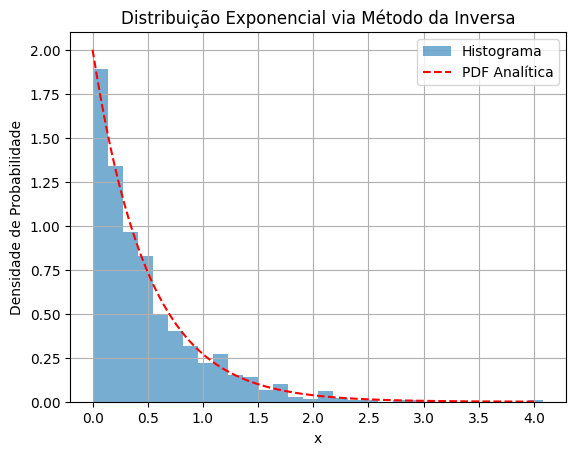

In [68]:
# Parâmetro da exponencial
lambda_exp = 2  # exemplo

# Geração de amostras
np.random.seed(42)
u = np.random.rand(1000) # Gera 1000 amostras uniformemente distribuídas em [0, 1)
x_samples = -np.log(1 - u) / lambda_exp

x_vals = np.linspace(0, 4, 200)
pdf_vals = lambda_exp * np.exp(-lambda_exp * x_vals)

# Plot
plt.hist(x_samples, bins=30, density=True, alpha=0.6, label='Histograma')
plt.plot(x_vals, pdf_vals, 'r--', label='PDF Analítica')
plt.title("Distribuição Exponencial via Método da Inversa")
plt.xlabel("x")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid()
plt.show()

# Exercício 8

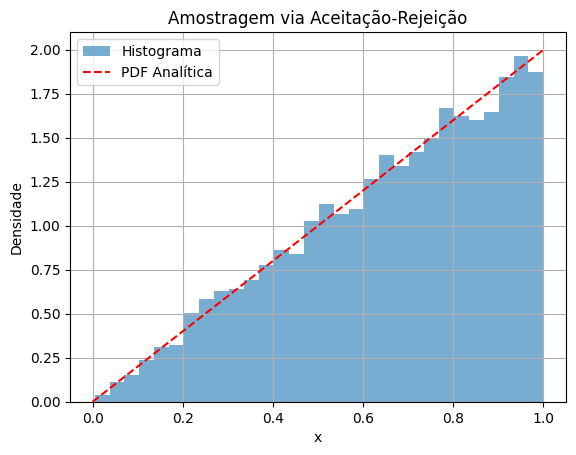

In [69]:
# Parâmetro
c = 2
n_samples = 10000
accepted = []

np.random.seed(42)

while len(accepted) < n_samples:
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, 1)
    if u <= x:  # pois f(x)/(c*g(x)) = x
        accepted.append(x)

accepted = np.array(accepted)

x_vals = np.linspace(0, 1, 200)
pdf_vals = 2 * x_vals

# Plot
plt.hist(accepted, bins=30, density=True, alpha=0.6, label='Histograma')
plt.plot(x_vals, pdf_vals, 'r--', label='PDF Analítica')
plt.title("Amostragem via Aceitação-Rejeição")
plt.xlabel("x")
plt.ylabel("Densidade")
plt.legend()
plt.grid()
plt.show()